In [1]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('C:/Users/cg08900/Documents/Pandora/Lavoro/Locale/Stima Immobiliare/datasets/stima_avm_train.csv', sep = "|")
test = pd.read_csv('C:/Users/cg08900/Documents/Pandora/Lavoro/Locale/Stima Immobiliare/datasets/stima_avm_test.csv', sep = "|")

In [2]:
train.head()

,n_edifici_res,n_bus_stops_r500,d_closest_metro_station,d_closest_railway_station,c_green_areas_clustered,l_pedestrian_paths_r500,n_historical_pois_r500,n_hotels_r500,n_kindergartens_r500,d_closest_airport,...,si_cella,ss_ext,ss_fam,ss_soc,ss_st,ss_mob,ss_edi,ss_osm,ss_cvd,valoredimercato
0,35,5,43582.407790,477.314534,0.0,449.386112,0,3,0,43762.135744,...,-2.314323,-2.494132,-2.512915,-2.450933,-2.362640,-2.368563,-2.587311,-2.379457,-2.310639,106000.0
1,35,5,43582.407790,477.314534,0.0,449.386112,0,3,0,43762.135744,...,-2.314323,-2.494132,-2.512915,-2.450933,-2.362640,-2.368563,-2.587311,-2.379457,-2.310639,154800.0
2,10,16,2362.093642,1600.652620,0.0,250.757592,0,1,0,13092.292379,...,-2.818069,-2.494132,-2.978809,-2.637844,-2.673811,-2.368563,-2.710469,-2.559831,-2.341720,110000.0
3,4,8,1615.134979,1317.766174,0.0,1338.370829,0,0,3,43762.135744,...,-3.009426,-2.494132,-3.120696,-2.907802,-2.707347,-2.368563,-2.710469,-2.471294,-2.341720,198000.0
4,124,6,43582.407790,101.819188,0.0,73.192558,0,0,0,43762.135744,...,-2.882244,-2.494132,-2.722226,-2.824426,-2.717288,-2.368563,-2.519824,-2.529206,-2.308975,95000.0


In [3]:
train.shape

(136820, 249)

In [5]:
train.dtypes.head()

n_edifici_res                  int64
n_bus_stops_r500               int64
d_closest_metro_station      float64
d_closest_railway_station    float64
c_green_areas_clustered      float64
dtype: object

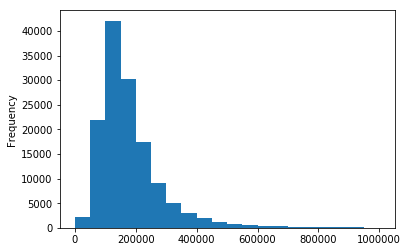

In [8]:
train.valoredimercato.plot(kind = 'hist', bins = 20)

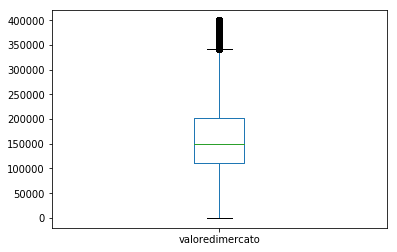

In [11]:
train[train.valoredimercato < 400000].valoredimercato.plot(kind = 'box')

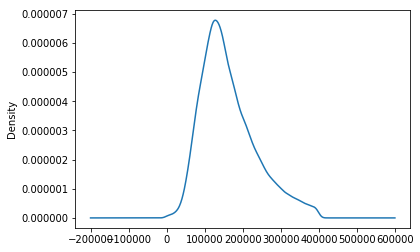

In [12]:
train[train.valoredimercato < 400000].valoredimercato.plot(kind = 'density')

In [17]:
train.cd_categoria.unique()

array(['A/3', 'A/2', 'A/7', 'A/4', 'A/10', 'A/5', 'A/6', 'A/1', 'A/11',
       'A/8', 'A/9'], dtype=object)

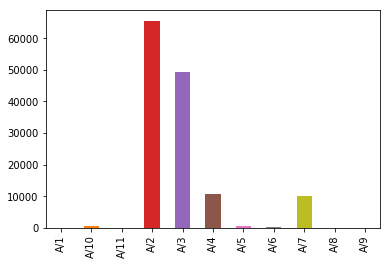

In [21]:
train.cd_categoria.value_counts().sort_index().plot(kind = 'bar')

In [23]:
train.groupby('cd_categoria').valoredimercato.mean().sort_values()

cd_categoria
A/5     105661.869124
A/11    127443.333333
A/4     132796.365603
A/6     139608.752525
A/3     155881.143236
A/2     191412.184482
A/10    197510.246824
A/7     256791.004254
A/9     281000.000000
A/1     443378.574286
A/8     517385.220588
Name: valoredimercato, dtype: float64

In [28]:
train.groupby(['cd_categoria']).valoredimercato.agg(['count', 'min', 'mean', 'median', 'max']).sort_values('median')

,count,min,mean,median,max
cd_categoria,,,,,
A/5,468,3000.0,105661.869124,70000.0,650700.0
A/6,99,6200.0,139608.752525,101722.5,779025.0
A/4,10661,1.0,132796.365603,114000.0,905000.0
A/3,49281,1.0,155881.143236,137362.5,998000.0
A/10,551,16000.0,197510.246824,144000.0,995600.0
A/11,3,51000.0,127443.333333,154330.0,177000.0
A/2,65559,1.0,191412.184482,163000.0,999920.0
A/7,10093,1.0,256791.004254,230000.0,998550.0
A/9,1,281000.0,281000.000000,281000.0,281000.0
